In [1]:
import os
import numpy as np
import tifffile
import pickle  

def compute_cumulative_intensities(data_dir="raw_data",
                                   cubes=range(1,5),
                                   conditions=range(1,13),
                                   lines=range(1,6),
                                   max_frames=None):
    """
    Loop over every cube, condition, and line, and for each video:
      - Read all (or up to `max_frames`) frames from the TIF.
      - Compute the sum of pixel intensities for each frame (float).
      - Store the resulting 1D array in a nested dictionary:
        results[cube][condition][line] = 1D array of sums.

    Parameters
    ----------
    data_dir : str
        Base directory where 'cubeX' folders reside.
    cubes : iterable
        Which cubes to process. Example: range(1,5).
    conditions : iterable
        Which conditions to process. Example: range(1,13).
    lines : iterable
        Which lines to process. Example: range(1,6).
    max_frames : int or None
        If not None, limits the number of frames read per video (for testing).

    Returns
    -------
    results : dict
        Nested dictionary with structure results[cube][condition][line] = 1D array (float).
    """

    results = {}

    for cube_number in cubes:
        results[cube_number] = {}

        cube_folder = f"cube{cube_number}"
        
        for condition_number in conditions:
            results[cube_number][condition_number] = {}

            # The subfolder name pattern
            condition_subfolder = f"cube{cube_number}_C001H001S00{condition_number:02d}"
            
            for line_number in lines:
                # The TIF filename pattern
                tif_filename = f"cube{cube_number}_C001H001S00{condition_number:02d}-{(line_number-1):02d}.tif"
                file_path = os.path.join(data_dir, cube_folder, condition_subfolder, tif_filename)
                
                # Safety check if file doesn't exist
                if not os.path.isfile(file_path):
                    print(f"Warning: File not found {file_path}. Skipping.")
                    continue
                
                print(f"Processing: Cube={cube_number}, Condition={condition_number}, Line={line_number}")
                
                # Read the frames, compute sum of intensities
                sums = []
                with tifffile.TiffFile(file_path) as tif:
                    n_frames = len(tif.pages)
                    frames_to_read = n_frames if max_frames is None else min(max_frames, n_frames)

                    for i in range(frames_to_read):
                        frame = tif.pages[i].asarray()  # uint16
                        # Sum of pixel intensities (convert to float to be safe)
                        frame_sum = float(np.sum(frame))
                        sums.append(frame_sum)
                
                # Store in the nested dictionary
                results[cube_number][condition_number][line_number] = np.array(sums, dtype=float)

    return results


def save_cumulative_intensities(results, filename="cumulative_intensities.pkl"):
    """
    Save the nested dictionary to disk with pickle.
    """
    with open(filename, "wb") as f:
        pickle.dump(results, f)
    print(f"Saved cumulative intensities to {filename}")



In [2]:
results = compute_cumulative_intensities(data_dir="raw_data", max_frames=None)


Processing: Cube=1, Condition=1, Line=1
Processing: Cube=1, Condition=1, Line=2
Processing: Cube=1, Condition=1, Line=3
Processing: Cube=1, Condition=1, Line=4
Processing: Cube=1, Condition=1, Line=5
Processing: Cube=1, Condition=2, Line=1
Processing: Cube=1, Condition=2, Line=2
Processing: Cube=1, Condition=2, Line=3
Processing: Cube=1, Condition=2, Line=4
Processing: Cube=1, Condition=2, Line=5
Processing: Cube=1, Condition=3, Line=1
Processing: Cube=1, Condition=3, Line=2
Processing: Cube=1, Condition=3, Line=3
Processing: Cube=1, Condition=3, Line=4
Processing: Cube=1, Condition=3, Line=5
Processing: Cube=1, Condition=4, Line=1
Processing: Cube=1, Condition=4, Line=2
Processing: Cube=1, Condition=4, Line=3
Processing: Cube=1, Condition=4, Line=4
Processing: Cube=1, Condition=4, Line=5
Processing: Cube=1, Condition=5, Line=1
Processing: Cube=1, Condition=5, Line=2
Processing: Cube=1, Condition=5, Line=3
Processing: Cube=1, Condition=5, Line=4
Processing: Cube=1, Condition=5, Line=5


Processing: Cube=4, Condition=1, Line=2
Processing: Cube=4, Condition=1, Line=3
Processing: Cube=4, Condition=1, Line=4
Processing: Cube=4, Condition=1, Line=5
Processing: Cube=4, Condition=2, Line=1
Processing: Cube=4, Condition=2, Line=2
Processing: Cube=4, Condition=2, Line=3
Processing: Cube=4, Condition=2, Line=4
Processing: Cube=4, Condition=2, Line=5
Processing: Cube=4, Condition=3, Line=1
Processing: Cube=4, Condition=3, Line=2
Processing: Cube=4, Condition=3, Line=3
Processing: Cube=4, Condition=3, Line=4
Processing: Cube=4, Condition=3, Line=5
Processing: Cube=4, Condition=4, Line=1
Processing: Cube=4, Condition=4, Line=2
Processing: Cube=4, Condition=4, Line=3
Processing: Cube=4, Condition=4, Line=4
Processing: Cube=4, Condition=4, Line=5
Processing: Cube=4, Condition=5, Line=1
Processing: Cube=4, Condition=5, Line=2
Processing: Cube=4, Condition=5, Line=3
Processing: Cube=4, Condition=5, Line=4
Processing: Cube=4, Condition=5, Line=5
Processing: Cube=4, Condition=6, Line=1


In [4]:
save_cumulative_intensities(results, "cumulative_intensities.pkl")

Saved cumulative intensities to cumulative_intensities.pkl


In [3]:
import pickle
import matplotlib.pyplot as plt

def load_cumulative_intensities(filename="cumulative_intensities.pkl"):
    """
    Load the nested dictionary {cube -> {condition -> {line -> 1D array}}}
    from a pickle file.
    """
    with open(filename, "rb") as f:
        data = pickle.load(f)
    print(f"Loaded cumulative intensities from {filename}")
    return data


def plot_cumulative_intensity(results, cube, condition, line):
    """
    Given the pre-computed results dictionary, plot the evolution of
    cumulative intensity for the specific cube, condition, and line.
    """
    signal = results[cube][condition][line]
    
    plt.figure(figsize=(6,4))
    plt.plot(signal, label=f'Cube={cube}, Condition={condition}, Line={line}')
    plt.xlabel('Frame index')
    plt.ylabel('Sum of pixel intensities')
    plt.title('Evolution of cumulative intensity over time')
    plt.legend()
    plt.grid(True)
    plt.show()



In [5]:
loaded_results = load_cumulative_intensities("cumulative_intensities.pkl")


Loaded cumulative intensities from cumulative_intensities.pkl


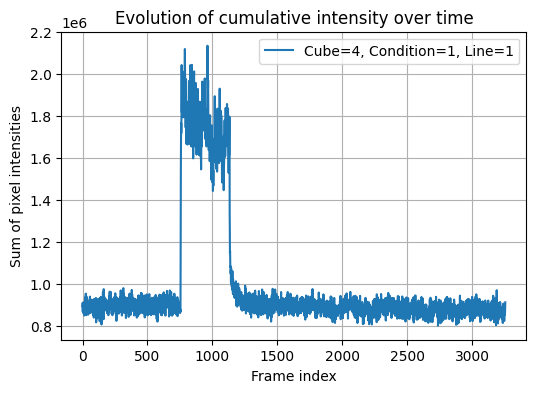

In [13]:
plot_cumulative_intensity(loaded_results, cube=4, condition=1, line=1)
